In [86]:
import torch
from pathlib import Path

from app.model.utils.checkpointer import Checkpointer
from app.model.utils.tokenizer import Tokenizer

checkpoint_path = Path('app/data/models/16600/state.pkl')
model, optimizer, evaluator, config = Checkpointer.load_checkpoint(
    checkpoint_path)
tokenizer = Tokenizer()
tokenizer.load()

Loaded checkpoint app/data/models/16600/state.pkl


In [87]:
sequence = 'One day, a boy named Tim saw a pale'
max_gen_len = 200
end_token = '<|endoftext|>'
while max_gen_len:
    tokens = torch.tensor(tokenizer.encode(sequence))
    next_token = model.generate_next_token(tokens).item()
    decoded_next_token = tokenizer.decode([int(next_token)])
    if sequence.endswith(end_token):
        break
    sequence += decoded_next_token
    max_gen_len -= 1
sequence

'One day, a boy named Tim saw a pale playing with a little girl namedendoftext|>\nOnce upon a time, there was a little girl named Lily. She was a little girl named Lily. She liked to play with her toys. One day, she went. She saw a big storm coming from the storm coming from the dark forest.\n<|endoftext|>'

In [88]:
evaluator.metrics['cross_entropy'].values[-1]

tensor(2.4585)

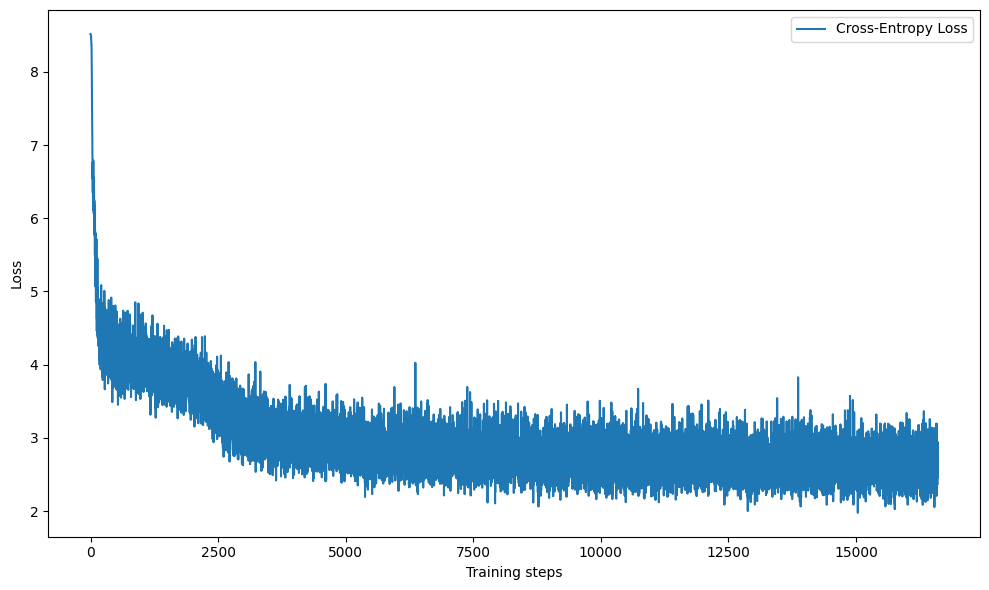

In [89]:
import matplotlib.pyplot as plt

cross_entropy_values = evaluator.metrics['cross_entropy'].values
steps = range(len(cross_entropy_values))

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(steps, cross_entropy_values, label='Cross-Entropy Loss')
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()